# Лабораторная работа №1

## Задание 1.
Реализуйте градиентный спуск с постоянным шагом. Исследуйте сходимость при разных значениях шага

Определим функцию, для которой будем выполнять задания

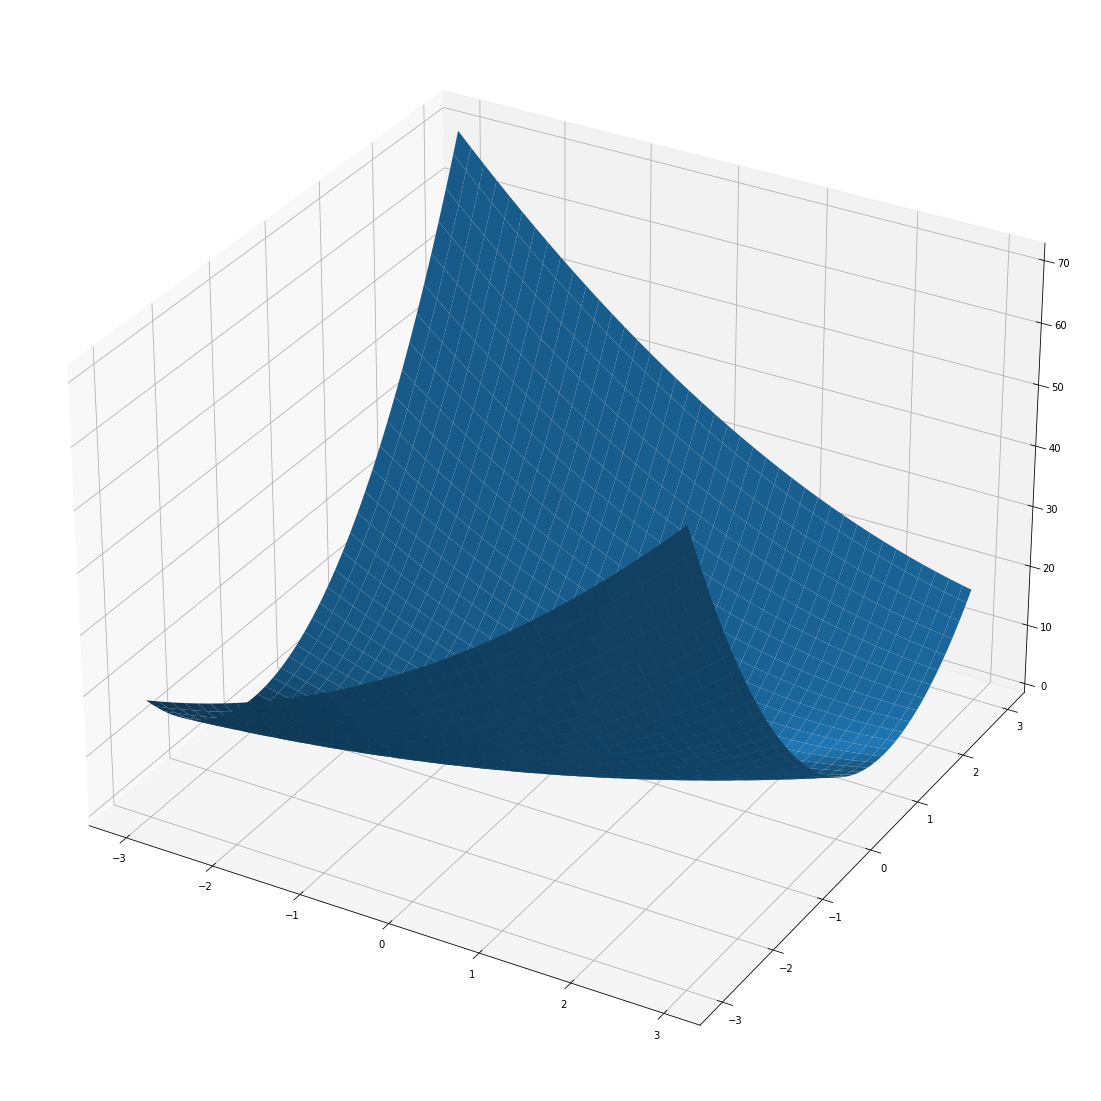

In [1]:
from graphic import F

F().draw()

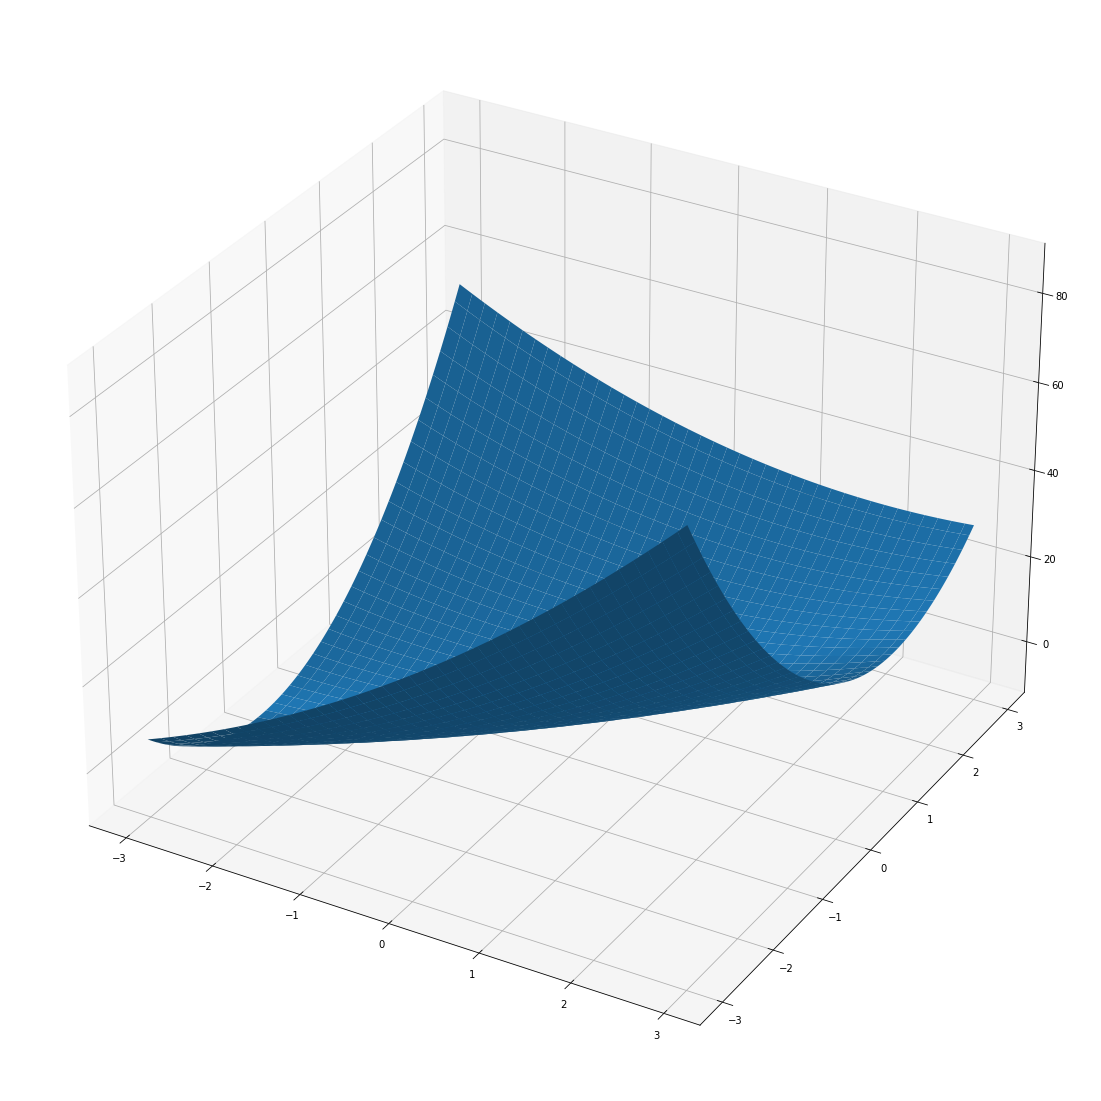

In [2]:
from graphic import G

g = G().draw()

In [3]:
from onedimsearch import StepByStep
from gradient import fund_best_schedule

'''
x = y = np.arange(-30.0, 30.0, 0.05)
plt.rcParams["figure.figsize"] = (20, 20)
X, Y = np.meshgrid(x, y)
points = learning_rate_gradient_steps(f, 0.19, 100, 1e-7)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, f(X, Y), levels=sorted(list(set([f(p[0], p[1]) for p in points] + list(np.linspace(-1, 1, 100))))))
'''
# print(find_best_learning_rate_gradient_steps(F(), 1000, 1e-7, [15, 15]))

fund_best_schedule(F(), StepByStep(), 1000, 1e-7, [15, 15])

/home/Vladislav.Kuznetsov/Vl/Projects/University/meth-opt/meth-opt-1/utils.py:2: RuntimeWarning: overflow encountered in double_scalars
  return (a ** 2 + b ** 2) ** 0.5
/home/Vladislav.Kuznetsov/Vl/Projects/University/meth-opt/meth-opt-1/graphic.py:40: RuntimeWarning: overflow encountered in double_scalars
  return np.array([2 * x - 3 * y, 8 * y - 3 * x])
/home/Vladislav.Kuznetsov/Vl/Projects/University/meth-opt/meth-opt-1/onedimsearch.py:17: RuntimeWarning: invalid value encountered in subtract
  return start - rate * vector


Best solutions:
Const: Rate=0.19 with 124 steps
Linear: Start=0.47000000000000003, Step=0.981 with 79 steps
Parabaloic: K=1.0 with 1000 steps
